In [1]:
%matplotlib inline

In [94]:
from pylab import *
from numpy import *
import numpy as np

GMs = 4*pi**2
CORR = 0


def f1(x,y,vx,vy,t):
    return vx

def f2(x,y,vx,vy,t):
    return vy

def f3(x,y,vx,vy,t, GAMMA):
    return -(GMs*x)/((x**2+y**2)**(3/2+CORR))*(1+ (GAMMA)/(x**2+y**2))

def f4(x,y,vx,vy,t, GAMMA):
    return -(GMs*y)/((x**2+y**2)**(3/2+CORR))*(1+ (GAMMA)/(x**2+y**2))

def solar_system_rk4(r0, v0, f1, f2, f3, f4, tmax, gamma):
    
    xpts = []
    ypts = []
    vxpts = []
    vypts = []
    h = .00001
    x = r0
    y = 0
    vx = 0
    vy = v0
    tpoints = arange(0, tmax, h)
    for t in tpoints:
        k1 = h*f1(x, y, vx, vy, t)
        l1 = h*f2(x, y, vx, vy, t)
        m1 = h*f3(x, y, vx, vy, t, gamma)
        n1 = h*f4(x, y, vx, vy, t, gamma)
        k2 = h*f1(x + k1/2, y+l1/2, vx+m1/2, vy+n1/2, t+h/2)
        l2 = h*f2(x + k1/2, y+l1/2, vx+m1/2, vy+n1/2, t+h/2)
        m2 = h*f3(x + k1/2, y+l1/2, vx+m1/2, vy+n1/2, t+h/2, gamma)
        n2 = h*f4(x + k1/2, y+l1/2, vx+m1/2, vy+n1/2, t+h/2, gamma)
        k3 = h*f1(x + k2/2, y+l2/2, vx+m2/2, vy+n2/2, t+h/2)
        l3 = h*f2(x + k2/2, y+l2/2, vx+m2/2, vy+n2/2, t+h/2)
        m3 = h*f3(x + k2/2, y+l2/2, vx+m2/2, vy+n2/2, t+h/2, gamma)
        n3 = h*f4(x + k2/2, y+l2/2, vx+m2/2, vy+n2/2, t+h/2, gamma)
        k4 = h*f1(x + k3, y+l3, vx+m3, vy+n3, t+h)
        l4 = h*f2(x + k3, y+l3, vx+m3, vy+n3, t+h)
        m4 = h*f3(x + k3, y+l3, vx+m3, vy+n3, t+h, gamma)
        n4 = h*f4(x + k3, y+l3, vx+m3, vy+n3, t+h, gamma)
        x = x + 1/6 * (k1 + 2* k2 + 2*k3 +k4)
        y = y + 1/6 * (l1 + 2* l2 + 2*l3 +l4)
        vx = vx + 1/6 * (m1 + 2* m2 + 2*m3 +m4)
        vy = vy + 1/6 * (n1 + 2* n2 + 2*n3 +n4)
        xpts.append(x)
        ypts.append(y)
        vxpts.append(vx)
        vypts.append(vy)
        
    return xpts, ypts, vxpts, vypts, tpoints

In [232]:
def get_vmin(alpha):
    xpts, ypts, vxpts, vypts, tpts = solar_system_rk4(.3897, 8.166, f1, f2, f3, f4, 1, alpha)
    vs = []
    thetas = []
    for i in range(len(xpts)):
        vs.append(sqrt(vxpts[i]**2 + vypts[i]**2))
        thetas.append(arctan2(ypts[i], xpts[i]))
    return vs, thetas, xpts, ypts, tpts

In [185]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), int(n)):
        yield l[i:i + int(n)]

90.46316419916202

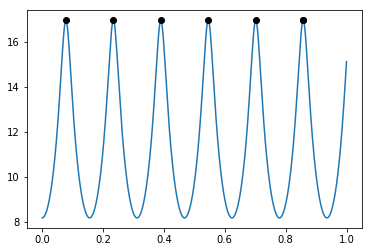

In [236]:
get_mean(.0008)

In [235]:
def get_mean(alpha):
    vs, thetas, xpts, ypts, tpts = get_vmin(alpha)
    rpts = []
    for i, x in enumerate(xpts):
        rpts.append(sqrt(x**2 + ypts[i]**2))
    maxs = [vs.index(max(x)) for x in chunks(vs, len(vs)/7)][:-1]
    dts = []
    for j, i in enumerate(maxs):
        try:
            time = tpts[i]
            tnext = tpts[i+1]
            dts.append((thetas[i+1] - thetas[i])/(tnext - time))
        except:
            pass
    plot(tpts, vs)
    plot([tpts[i] for i in maxs], [vs[i] for i in maxs],"ok")
    return mean(dts)

In [237]:
%%time
import multiprocessing
alphas = linspace(.0001, .001, 100)
pool = multiprocessing.Pool()
means = pool.map(get_mean, alphas)

[87.20842245641316, 87.25164420297207, 87.29485006670623, 87.33804131900419, 87.38121136344849, 87.42436355765908, 87.46750137395304, 87.51061845062654, 87.55371059675144, 87.59678864850979, 87.6398449666368, 87.68287888307376, 87.72589801415144, 87.76888881023312, 87.81186358761417, 87.85481715732146, 87.89774566238023, 87.94065238346103, 87.9835383631643, 88.0263995389917, 88.06923415812302, 88.1120545400988, 88.15485025887301, 88.19762098261312, 88.24036153755507, 88.2830764801629, 88.32577443689162, 88.3684413568666, 88.4110830557343, 88.453700628822, 88.49629223854663, 88.53885279946431, 88.58139129985129, 88.62390357190188, 88.66638384240414, 88.7088371469011, 88.75126356989952, 88.79366248485472, 88.83603341425952, 88.87837262681794, 88.9206830717587, 88.96296694189111, 89.00521778265002, 89.04743891371481, 89.08963423225866, 89.13179149522624, 89.17391709136236, 89.21602096770823, 89.25809223518154, 89.30013072319755, 89.34212925551859, 89.38409967712616, 89.42604256106306, 89.

Mercury's Perihelion processes at a rate of  43.616000288330824


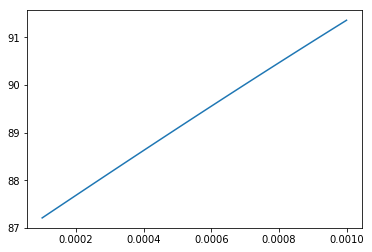

In [238]:
from scipy import stats

plot(alphas, means)

mercury_alpha = .0001
slope, intercept, r_value, p_value, std_err = stats.linregress(alphas, means)
print("Mercury's Perihelion processes at a rate of ",((slope * mercury_alpha)+ intercept)/2)